# Numpy, Scipy, and Pandas

# Numpy

In [11]:
import numpy as np  

my_arr = np.array([[1,2,3],[4,5,6]])  # creating a numpy array
my_arr.shape  # tuple expressing shape
my_arr.dtype  # data type

dtype('int64')

In [2]:
np.arange(0,10)  # similar to range()
np.random.rand(3,4)
np.linspace(0,1,5)  # linearly separated range of numbers
my_arr = np.zeros((2,5,2))  # 3-D array
my_arr = my_arr.reshape((4,5))  # reshape given array 
print(my_arr)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [20]:
my_arr = np.arange(25).reshape(5,5)
my_arr < 10  # 5x5 boolean array
my_arr[my_arr < 10] = 10
print(my_arr)

[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [21]:
print(my_arr[3])  # fourth row
print(my_arr[3][3])  # fourth row fourth column
print(my_arr[3,3])  # fourth row fourth column
print("max is: " + str(my_arr.max()))
print("occurs at: " + str(my_arr.argmax()) + " index")

[15 16 17 18 19]
18
18
max is: 24
occurs at: 24 index


In [22]:
my_arr[:2,:2] = 3  # broadcast value 3 to a subarray specified by slicing
print(my_arr)

[[ 3  3 10 10 10]
 [ 3  3 10 10 10]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [23]:
slice_of_array = my_arr[:2,:2]
slice_of_array[:] = 9  # modifies original array since slicing creates new reference, not copy
print(my_arr)
new_arr = my_arr.copy()  # copy array

[[ 9  9 10 10 10]
 [ 9  9 10 10 10]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [24]:
print(my_arr.sum())  # sum of array
sum(my_arr)  # sum of array columns


351


array([63, 66, 71, 74, 77])

# Scipy

Least squares curve fitting using scipy.optimize.curve_fit function

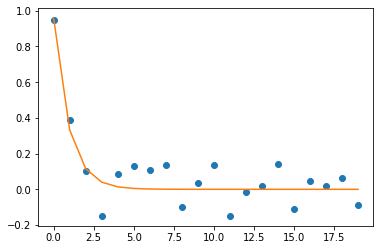

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.arange(20)
y = np.exp(-x) + np.random.normal(0,1/10,20)
plt.plot(x,y,'o')

# parameteric function to fit
def exp_func(x, a, b):
    return a * np.exp(-b*x)

popt, pcov = curve_fit(exp_func, x, y, p0=(2, 1))
z = exp_func(x, *popt)
plt.plot(x,z)


# Pandas

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [12]:
df = pd.DataFrame(randn(5,4), ['A','B','C','D','E'], ['W','X','Y','Z'])
df.shape  # returns tuple expressing dimensions
df.info()  # returns dimensions and types
df.describe()  # statistical summary of columns
df.columns  # column names

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 4 columns):
W    5 non-null float64
X    5 non-null float64
Y    5 non-null float64
Z    5 non-null float64
dtypes: float64(4)
memory usage: 200.0+ bytes


Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [27]:
df[['W','Z']]  # grab columns by labels
df.loc['C']  # grab a row by label
df.iloc[2]  # grab a row by index
df.loc[['A','C'],['W','Z']] # grab some rows and columns

,W,Z
A,0.357771,0.685562
C,1.898327,0.299116


In [28]:
df['ZZ'] = df['W'] + df['Y']  # add a new column
df.drop('E', inplace = True)  # drop an existing row
df.drop('X', axis = 1, inplace = True)  # drop a column

In [7]:
df[df > 0] = 0  # broadcast 0 to locations captured by binary DF

In [9]:
df[(df['W']<0) & (df['Y'] < -0.2)]  # use & since we have multiple boolean values
df

,W,X,Y,Z
A,0.000000,-0.834356,-0.424786,-0.971859
B,-1.753421,-0.231971,-0.101744,-0.385592
C,0.000000,-0.727965,0.000000,0.000000
D,0.000000,0.000000,-1.858124,0.000000
E,0.000000,-0.484919,-0.744342,-1.200016


In [31]:
df.reset_index(inplace=True)  # remove row labels
df

,index,W,Y,Z,ZZ
0,A,0.0,-0.286658,0.000000,0.0
1,B,0.0,-1.360825,0.000000,0.0
2,C,0.0,-0.401631,0.000000,0.0
3,D,0.0,0.000000,-1.476045,0.0


In [32]:
df['States'] = ['NY', 'OR', 'CA', 'TX']  # add a new column
df.set_index('States', inplace=True)  # create new row labels
df

,index,W,Y,Z,ZZ
States,,,,,
NY,A,0.0,-0.286658,0.000000,0.0
OR,B,0.0,-1.360825,0.000000,0.0
CA,C,0.0,-0.401631,0.000000,0.0
TX,D,0.0,0.000000,-1.476045,0.0


In [33]:
d = {'A': [1,2,np.nan], 'B': [5, np.nan, np.nan], 'C': [1,2,3]}
df = pd.DataFrame(d)
print(df.dropna(thresh=2))  # drop any rows with 2 or more missing values
print(df.dropna(axis=1))  # drop any columns with some missing values
df.fillna(value=-1)  # replace na with -1

     A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
   C
0  1
1  2
2  3


,A,B,C
0,1.0,5.0,1
1,2.0,-1.0,2
2,-1.0,-1.0,3


In [10]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [66]:
byComp = df.groupby('Company')  # group by company 
byComp.mean()  # aggregate by mean (drops non-numeric columns)

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [67]:
byComp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [68]:
pd.concat([df, df], axis = 0)  # concatanate rows
pd.concat([df, df], axis = 1)  # concatanate columns
pd.merge(df, df, how = "inner", on = "Person")  # join of columns
# alternative method for join of columns: df1.join(df2, how = "outer")

,Company_x,Person,Sales_x,Company_y,Sales_y
0,GOOG,Sam,200,GOOG,200
1,GOOG,Charlie,120,GOOG,120
2,MSFT,Amy,340,MSFT,340
3,MSFT,Vanessa,124,MSFT,124
4,FB,Carl,243,FB,243
5,FB,Sarah,350,FB,350


In [83]:
df['Company'].unique()  # unique column values
df['Company'].nunique()  # number of unique values
df['Company'].value_counts()  # count of unique values
df[df['Sales']>200]  # conditional selection of rows
df['Sales'].apply(lambda x: x**2)  # apply function on column
df.drop('Sales', axis = 1)  # drop a columm
df.columns  # returns list of column names
df.sort_values('Person')
df.isnull()
df.head()
df.pivot_table(values='Sales',index=['Person'],columns=['Company'])
df.to_csv("sales_file.csv")

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
